In [1]:
from phasemaps import Phasemaps

In [2]:
%load_ext autoreload
%autoreload 2

# Create Phasemaps

In [3]:
wave = [2., 2.25, 2.5]
pm = Phasemaps(wave, 'AT')
# If the phasemaps should be used for fitting they need to be created for each wavelength channel
# As this is computationally expensive (~7s per channel) mutithreading is available via nthreads option
pm.createPhasemaps(smooth=1, nthreads=1)

Complete: 100%%


# Plot Phasemaps

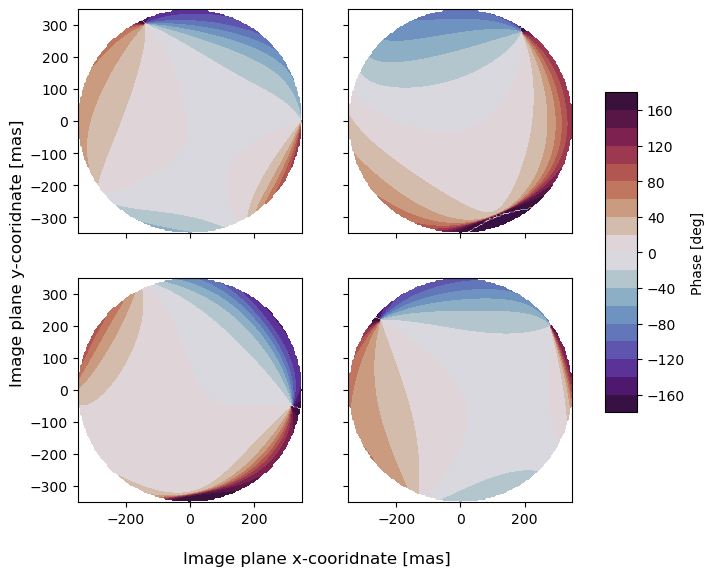

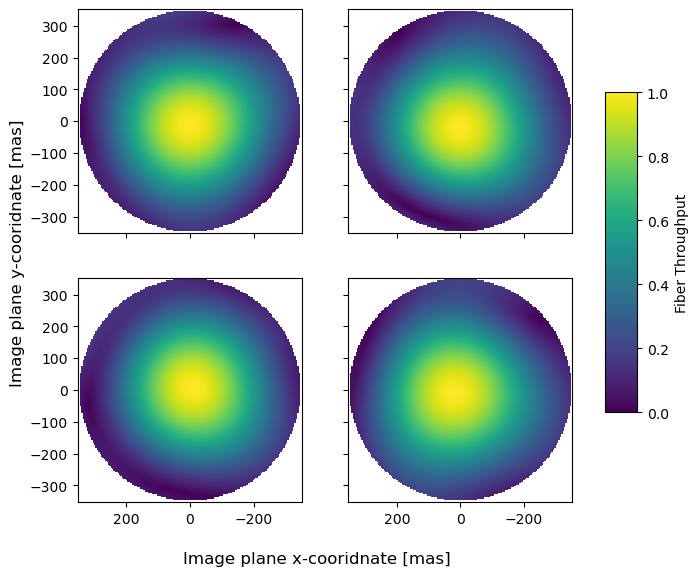

In [4]:
pm.plotPhasemaps(pm.phasemap[1])

# Read out phasemaps
For reading out the phasemaps one needs several parameter:
- Ra, Dec position of Target relative to fiber center [mas]
- Northangle: rotation angle of the acquisition camera (from header of a reduced file)
- dRa, dDec: misspointing of the fiber (from header of a reduced file)

In [6]:
# example on how to extract the header values from a reduced file
# header = fits.open(file)[0].header
# northangle = [header['ESO QC ACQ FIELD%i NORTH_ANGLE' % (i+1)]/180*np.pi for i in range(4)]
# dra = [header['ESO QC MET SOBJ DRA%i' % (i+1)] for i in range(4)]
# ddec = [header['ESO QC MET SOBJ DDEC%i' % (i+1)] for i in range(4)]

In [7]:
# example values
northangle = [-0.076, -0.072, -0.076, -0.076]
dra = [-0.654, -0.651, -0.306, -0.588]
ddec =[-0.171, -0.636, -0.274, -0.619]
ra = 10
dec = 10

amplitude, phase, intensity = pm.readPhasemaps(ra, dec, northangle, dra, ddec)

In [8]:
# output has shape number telescopes x length wave
print(phase)

[[-0.59605273 -1.21513401 -1.54213971]
 [-3.09689046 -3.45254583 -3.58387586]
 [ 0.09310477  0.9519982   1.65253584]
 [-2.08604749 -1.01559845 -0.02400342]]
